In [2]:
import pandas as pd
import numpy as np
import time

In [18]:
data = pd.read_table('../data/raw/milan/mi-mi/2013-11-01.txt',names = ['time','from','to','strength'])

In [82]:
#transform the time into hour-minute format
data['hour'] = data['time'].apply(lambda x: time.gmtime(x/1000).tm_hour)
data['min'] = data['time'].apply(lambda x: time.gmtime(x/1000).tm_min)

In [20]:
data.loc[99979]

time        1.383339e+12
from        1.025000e+03
to          5.220000e+02
strength    2.152757e-05
Name: 99979, dtype: float64

In [85]:
datagroup = data.drop(['hour','min'],axis = 1).reset_index(drop = True).groupby(['from','to']).sum()

In [93]:
type(data.drop(['hour','min'],axis = 1).reset_index(drop = True).groupby(['from','to']))

pandas.core.groupby.DataFrameGroupBy

In [97]:
row = []
col = []
strength = []
for (f,t),d in data.drop(['hour','min'],axis = 1).reset_index(drop = True).groupby(['from','to']):
    row.append(f)
    col.append(t)
    strength.append(d.strength.sum())

In [113]:
row = np.array(row)
col = np.array(col)
stre = np.array(strength)

In [153]:
#a = np.array([])
a = np.append(a,5)
a

array([ 3.,  5.])

In [134]:
from spicy import sparse

ImportError: cannot import name 'sparse'

In [162]:
from scipy.sparse import csr_matrix
cm = csr_matrix((stre,(row,col)),shape = (10001,10001))

In [154]:
import scipy.sparse

In [156]:
scipy.sparse.save_npz('/test.npz',cm)

In [161]:
cmmm = scipy.sparse.load_npz('/test.npz')

In [159]:
type(cmmm)

scipy.sparse.csr.csr_matrix

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
datagroup.loc[10000][:].loc[9890]['strength']

0.00077322359658332459

In [9]:
datagroup.loc[1][:].loc[3]['strength']

0.00175545578991505

In [65]:
datagroup = datagroup.drop(['time'],axis = 1)

In [66]:
datagrid = datagroup.unstack()
datagrid

strength                                                              \
to        1         2         3         4         5         6         7       
from                                                                          
1      0.001433  0.001704  0.001755  0.001899  0.001424  0.002051  0.002225   
10     0.001428  0.001572  0.001565  0.001025  0.001271  0.001608  0.001669   
100         NaN       NaN       NaN       NaN  0.000020       NaN       NaN   
101    0.002028  0.002215  0.001578  0.001637  0.001457  0.002109  0.001803   
102    0.001464  0.001513  0.001767  0.001335  0.001454  0.001876  0.001311   
1000        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1001   0.000331  0.000002  0.000234  0.000230  0.000249  0.000172  0.000277   
1002   0.000223  0.000239  0.000172  0.000290  0.000305       NaN  0.000234   
1003   0.000271  0.000321       NaN  0.000227  0.000208  0.000218  0.000164   
1004   0.000235  0.000223  0.000259  0.000192  0.000273  0.000342       NaN   
1005   0.000144  0.000213  0.000260  0.000007  0.000182  0.000166  0.000194   
1006   0.000054  0.000137  0.000118  0.000172  0.000111  0.000167  0.000173   
1007   0.000069  0.000053  0.000084  0.000058  0.000055  0.000058  0.000048   
1008   0.000015  0.000109  0.000040  0.000024  0.000062  0.000068  0.000057   
1009   0.000016  0.000075  0.000117  0.000068  0.000022  0.000175  0.000052   
1010   0.000059  0.000005  0.000187  0.000053  0.000015  0.000096  0.000129   
1011   0.000053  0.000009  0.000105  0.000128  0.000078  0.000008  0.000183   
1012   0.000123  0.000064  0.000010  0.000158  0.000048  0.000009  0.000129   
1013   0.000142  0.000053  0.000026  0.000111  0.000088  0.000080  0.000027   
1014   0.000082  0.000059  0.000099  0.000037  0.000103  0.000052  0.000045   
1015   0.000045  0.000104  0.000050  0.000062  0.000088  0.000050  0.000100   
1016   0.000048  0.000016  0.000046  0.000108  0.000039  0.000094  0.000046   
1017   0.000109  0.000047  0.000106  0.000066  0.000058  0.000003  0.000052   
1018   0.000069  0.000055  0.000022  0.000053  0.000095  0.000034  0.000052   
1019   0.000039  0.000040       NaN       NaN  0.000069  0.000042  0.000042   
1020        NaN  0.000081  0.000042  0.000033  0.000032  0.000042       NaN   
1021   0.000039  0.000040  0.000042  0.000006       NaN  0.000085  0.000042   
1022   0.000003       NaN  0.000085  0.000040  0.000032  0.000042  0.000042   
1023   0.000041  0.000040  0.000042  0.000033  0.000007       NaN  0.000085   
1024   0.000044  0.000016       NaN  0.000065  0.000042  0.000045  0.000042   
1025   0.000077  0.000042  0.000042  0.000033  0.000032       NaN       NaN   
10000       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                                       ...                                \
to        8         9         10       ...        9991      9992   9993    
from                                   ...                                 
1      0.001530  0.001735  0.001556    ...          NaN       NaN    NaN   
10     0.001509  0.001601  0.001232    ...          NaN       NaN    NaN   
100         NaN       NaN       NaN    ...          NaN       NaN    NaN   
101    0.002095  0.002255  0.001403    ...          NaN       NaN    NaN   
102    0.001517  0.001560  0.001117    ...          NaN  0.000002    NaN   
1000        NaN       NaN       NaN    ...          NaN       NaN    NaN   
1001   0.000342       NaN  0.000178    ...          NaN       NaN    NaN   
1002   0.000220  0.000231  0.000198    ...          NaN       NaN    NaN   
1003   0.000265  0.000326  0.000096    ...          NaN       NaN    NaN   
1004   0.000234  0.000221       NaN    ...          NaN       NaN    NaN   
1005   0.000139  0.000212  0.000110    ...          NaN       NaN    NaN   
1006   0.000053  0.000136  0.000166    ...          NaN       NaN    NaN   
1007   0.000063  0.000052  0.000028    ...          NaN       NaN    NaN   
1008   0.000016  0.000111

In [13]:
datagrid = datagrid.fillna(0)

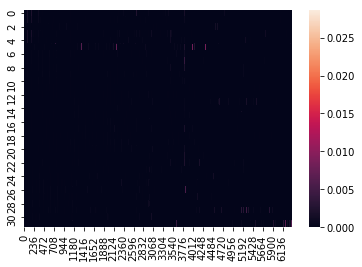

In [21]:
s = sns.heatmap(datagrid.values)

In [23]:
s.savefig('s.png')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [27]:
from os import walk

In [29]:
dir_ = '../data/raw/milan/mi-mi/'

In [34]:
for _,_, file in walk(dir_):
    for f in file:
        print(f)
        data = pd.read_table(dir_+'/'+f, names = ['time','from','to','strength'])
        datagroup = data.groupby(['from','to']).sum()
        datagroup = datagroup.drop(['time'],axis = 1)
        datagrid = datagroup.unstack().fillna(0)
        datagrid.to_csv(f.replace("txt", "csv"))
        #logging.info(f+' processing done..')
        break

2013-11-01.txt


In [40]:
data = pd.read_table('../data/raw/milan/mi-mi/2013-11-01.txt', names = ['time','from','to','strength'])
datagroup = data.groupby(['from','to']).sum()
datagroup = datagroup.drop(['time'],axis = 1)
datagrid = datagroup.unstack().fillna(0)
datagrid.to_csv(f.replace("txt", "csv"),header = None, index = None)

In [45]:
datagrid

strength                                                              \
to        1         2         3         4         5         6         7       
from                                                                          
1      0.001433  0.001704  0.001755  0.001899  0.001424  0.002051  0.002225   
10     0.001428  0.001572  0.001565  0.001025  0.001271  0.001608  0.001669   
100    0.000000  0.000000  0.000000  0.000000  0.000020  0.000000  0.000000   
101    0.002028  0.002215  0.001578  0.001637  0.001457  0.002109  0.001803   
102    0.001464  0.001513  0.001767  0.001335  0.001454  0.001876  0.001311   
1000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1001   0.000331  0.000002  0.000234  0.000230  0.000249  0.000172  0.000277   
1002   0.000223  0.000239  0.000172  0.000290  0.000305  0.000000  0.000234   
1003   0.000271  0.000321  0.000000  0.000227  0.000208  0.000218  0.000164   
1004   0.000235  0.000223  0.000259  0.000192  0.000273  0.000342  0.000000   
1005   0.000144  0.000213  0.000260  0.000007  0.000182  0.000166  0.000194   
1006   0.000054  0.000137  0.000118  0.000172  0.000111  0.000167  0.000173   
1007   0.000069  0.000053  0.000084  0.000058  0.000055  0.000058  0.000048   
1008   0.000015  0.000109  0.000040  0.000024  0.000062  0.000068  0.000057   
1009   0.000016  0.000075  0.000117  0.000068  0.000022  0.000175  0.000052   
1010   0.000059  0.000005  0.000187  0.000053  0.000015  0.000096  0.000129   
1011   0.000053  0.000009  0.000105  0.000128  0.000078  0.000008  0.000183   
1012   0.000123  0.000064  0.000010  0.000158  0.000048  0.000009  0.000129   
1013   0.000142  0.000053  0.000026  0.000111  0.000088  0.000080  0.000027   
1014   0.000082  0.000059  0.000099  0.000037  0.000103  0.000052  0.000045   
1015   0.000045  0.000104  0.000050  0.000062  0.000088  0.000050  0.000100   
1016   0.000048  0.000016  0.000046  0.000108  0.000039  0.000094  0.000046   
1017   0.000109  0.000047  0.000106  0.000066  0.000058  0.000003  0.000052   
1018   0.000069  0.000055  0.000022  0.000053  0.000095  0.000034  0.000052   
1019   0.000039  0.000040  0.000000  0.000000  0.000069  0.000042  0.000042   
1020   0.000000  0.000081  0.000042  0.000033  0.000032  0.000042  0.000000   
1021   0.000039  0.000040  0.000042  0.000006  0.000000  0.000085  0.000042   
1022   0.000003  0.000000  0.000085  0.000040  0.000032  0.000042  0.000042   
1023   0.000041  0.000040  0.000042  0.000033  0.000007  0.000000  0.000085   
1024   0.000044  0.000016  0.000000  0.000065  0.000042  0.000045  0.000042   
1025   0.000077  0.000042  0.000042  0.000033  0.000032  0.000000  0.000000   
10000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                       ...                                \
to        8         9         10       ...        9991      9992   9993    
from                                   ...                                 
1      0.001530  0.001735  0.001556    ...     0.000000  0.000000  0.000   
10     0.001509  0.001601  0.001232    ...     0.000000  0.000000  0.000   
100    0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.000   
101    0.002095  0.002255  0.001403    ...     0.000000  0.000000  0.000   
102    0.001517  0.001560  0.001117    ...     0.000000  0.000002  0.000   
1000   0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.000   
1001   0.000342  0.000000  0.000178    ...     0.000000  0.000000  0.000   
1002   0.000220  0.000231  0.000198    ...     0.000000  0.000000  0.000   
1003   0.000265  0.000326  0.000096    ...     0.000000  0.000000  0.000   
1004   0.000234  0.000221  0.000000    ...     0.000000  0.000000  0.000   
1005   0.000139  0.000212  0.000110    ...     0.000000  0.000000  0.000   
1006   0.000053  0.000136  0.000166    ...     0.000000  0.000000  0.000   
1007   0.000063  0.000052  0.000028    ...     0.000000  0.000000  0.000   
1008   0.000016  0.000111

In [43]:
d = pd.read_csv('2013-11-01.csv',header = None)

In [44]:
d

,0,1,2,3,4,5,6,7,8,9,...,6352,6353,6354,6355,6356,6357,6358,6359,6360,6361
0,0.001433,0.001704,0.001755,0.001899,0.001424,0.002051,0.002225,0.001530,0.001735,0.001556,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.001428,0.001572,0.001565,0.001025,0.001271,0.001608,0.001669,0.001509,0.001601,0.001232,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.002028,0.002215,0.001578,0.001637,0.001457,0.002109,0.001803,0.002095,0.002255,0.001403,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.001464,0.001513,0.001767,0.001335,0.001454,0.001876,0.001311,0.001517,0.001560,0.001117,...,0.000000,0.000002,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000331,0.000002,0.000234,0.000230,0.000249,0.000172,0.000277,0.000342,0.000000,0.000178,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000223,0.000239,0.000172,0.000290,0.000305,0.000000,0.000234,0.000220,0.000231,0.000198,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.000271,0.000321,0.000000,0.000227,0.000208,0.000218,0.000164,0.000265,0.000326,0.000096,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.000235,0.000223,0.000259,0.000192,0.000273,0.000342,0.000000,0.000234,0.000221,0.000000,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [ ]:
import scipy.sparse
from scipy.sparse import dok_matrix
file_path = '../data/raw/milan/mi-mi/MItoMI-2013-11-03.txt'
with open(file_path,'r') as f:
    timeIntervalsheets = {}
    for line_terminated in f:
        line = line_terminated.rstrip('\n').split()
        t, from_,to_,data = int(line[0]), int(line[1]),int(line[2]),float(line[3])
        if t in timeIntervalsheets:
            if (from_, to_) in timeIntervalsheets[t]:
                timeIntervalsheets[t][from_,to_] +=data
            else:
                timeIntervalsheets[t][from_,to_] = data
        else:
            timeIntervalsheets[t] = dok_matrix((10001,10001),dtype = np.float32)
    for t in timeIntervalsheets:
        print(t)
        S = timeIntervalsheets[t].tocsr()
        scipy.sparse.save_npz('./demo/{}.npz'.format(t),S)

In [10]:
tmp = scipy.sparse.load_npz('1383339000000.npz')

In [11]:
tmp

<10001x10001 sparse matrix of type '<class 'numpy.float32'>'
	with 671 stored elements in Compressed Sparse Row format>

In [12]:
tt = tmp.toarray()

In [14]:
tt[1025][522]

2.1527572e-05